In [4]:
import pyemma
import glob
import numpy as np
import pyemma.plots as mplt
%pylab inline
import mdtraj as md
import pyemma.coordinates as coor
 
def average_by_state(dtraj, x, nstates):
    assert(len(dtraj) == len(x))
    N = len(dtraj)
    res = np.zeros((nstates))
    for i in range(nstates):
        I = np.argwhere(dtraj == i)[:,0]
        res[i] = np.mean(x[I])
    return res
 
def avg_by_set(x, sets):
    # compute mean positions of sets. This is important because of some technical points the set order
    # in the coarse-grained TPT object can be different from the input order.
    avg = np.zeros(len(sets))
    for i in range(len(sets)):
        I = list(sets[i])
        avg[i] = np.mean(x[I])
    return avg

Populating the interactive namespace from numpy and matplotlib


In [5]:
#Makes a list of nested lists for 5 mds, and 5 .nc files in each
trajfile = []
for i in range(1,6):
    nc_list = []
    for k in range(1,6):
        path = "/net/jam-amaro-shared/bccgc4/CatSMD/md"+str(i)+"/"+str(k)+".nc"
        nc_list.append(path)
    trajfile.append(nc_list)
    
#print(trajfile)

#assigns the features
feat = coor.featurizer("/net/jam-amaro-shared/bccgc4/CatSMD/md1/system.prmtop")
feat.add_residue_mindist([[146,187],[116,136],[142,143],[71,212],[27,29],[117,187],[64,160],[119,20],[216,191],[24,146],[114,119]], scheme="closest-heavy")
print(feat.describe()[:13])
#selecting distances at minimum & closest heavy atoms
    
#feat.add_minrmsd_to_ref(traj[0])
inp = coor.source(trajfile, feat)
print(inp)
print('trajectory length = ',inp.trajectory_length(0))
print('number of dimension = ',inp.dimension())
  



['RES_DIST (closest-heavy) PHE146 - TRP187', 'RES_DIST (closest-heavy) GLU116 - SER136', 'RES_DIST (closest-heavy) ARG142 - HIS143', 'RES_DIST (closest-heavy) PHE71 - PHE212', 'RES_DIST (closest-heavy) TRP27 - PHE29', 'RES_DIST (closest-heavy) LEU117 - TRP187', 'RES_DIST (closest-heavy) ASN64 - THR160', 'RES_DIST (closest-heavy) TYR119 - GLN20', 'RES_DIST (closest-heavy) PRO216 - PHE191', 'RES_DIST (closest-heavy) GLY24 - PHE146', 'RES_DIST (closest-heavy) TYR114 - TYR119']
trajectory length =  90000
number of dimension =  11


In [6]:
lag=1000
tica_obj = coor.tica(inp, lag=lag, var_cutoff=0.95, kinetic_map=False)
# here we get the data that has been projected onto the first 2 IC's. It's a list, because we could generally
# have a list of trajectories, so we just get the first element.
Y = tica_obj.get_output()
#print('Projected data shape = ', Y.shape)

print('Mean values: ', np.mean(Y, axis=0))
print('Variances:   ', np.var(Y, axis=0))
print(-lag/np.log(tica_obj.eigenvalues[:5]))
 
# histogram data
#z,x,y = np.histogram2d(Y[:,0],Y[:,1], bins=50)
# compute free energies
#F = -np.log(z)
# contour plot
#extent = [x[0], x[-1], y[0], y[-1]]
#contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)

#making clusters from kmeans
cl = coor.cluster_kmeans(data=Y,k=10)

#cl=coor.cluster_uniform_time(data=Y, )
# for later use we save the discretetrajectories (dtrajs) and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
 
#plotting out the results and clustercenters 
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plot(cc_x,cc_y, linewidth=0, marker='o')
 
print(dtrajs)
print(np.size(dtrajs))


Mean values:  [[-1.6133721   0.43638834  0.739573  ]
 [-1.3850038   0.5213238   0.91248465]
 [-1.5028572   0.65999645  0.89443415]
 ...
 [ 0.5598651  -0.43623924 -0.65678775]
 [ 0.5868933  -0.44692063 -0.3782111 ]
 [ 0.46868834 -0.44397897 -0.15848942]]
Variances:    [[0.01814618 0.18879817 0.6114186 ]
 [0.17720881 0.0418978  0.35092434]
 [0.08257592 0.13028173 0.17668575]
 ...
 [0.6888858  1.4884455  0.40055332]
 [0.5791992  1.2259517  0.82160395]
 [0.3342529  0.90886843 0.41794878]]
[1754.63231863  965.30829774  677.58519454  423.40835539  343.949736  ]


16-11-18 23:17:22 pyemma.coordinates.clustering.kmeans.KmeansClustering[28] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


NameError: name 'F' is not defined

In [8]:
cl = coor.cluster_kmeans(data=Y,k=10)

#cl=coor.cluster_uniform_time(data=Y, )
# for later use we save the discretetrajectories (dtrajs) and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
 
#plotting out the results and clustercenters 
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plot(cc_x,cc_y, linewidth=0, marker='o')
 
print(dtrajs)
print(np.size(dtrajs))

15-11-18 21:46:44 pyemma.coordinates.clustering.kmeans.KmeansClustering[32] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


NameError: name 'F' is not defined

[-0.09716513  0.9416013  -1.4021636   0.70201105 -0.59379303  0.06419989
 -1.1028148   1.5408367  -0.09593611 -1.4452718 ]
[-1.2181692   0.23959588  0.5834352  -0.11492619  1.5670834  -0.81715286
  0.53842217  0.87786686 -1.1752999   0.3825211 ]


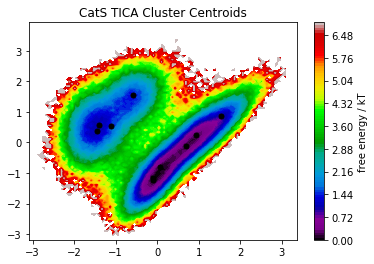

In [7]:
#plots free energy diagram
fig, axes= mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1])
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')
title("CatS TICA Cluster Centroids" )

fig.savefig("tica_FE.png", dpi = 100)

print(cc_x)
print(cc_y)

In [8]:
#This tells us how much each feature contributes to each TIC
tica_obj.feature_TIC_correlation

array([[-7.87387408e-02, -3.68212266e-02, -2.35290772e-03],
       [-3.76031836e-02,  5.99394478e-04,  3.38061107e-02],
       [-6.46345438e-03, -1.96376026e-03, -2.17023188e-03],
       [-8.00493419e-01,  5.78973509e-01,  6.27073917e-02],
       [ 8.10931749e-02,  6.79184138e-02,  2.74853845e-02],
       [-1.11191129e-02,  1.14119456e-02,  3.37291436e-02],
       [ 6.22111594e-01,  7.36973140e-01,  4.36155321e-02],
       [ 1.47632245e-01, -2.81385849e-01, -1.03837994e-01],
       [-9.18043855e-02, -9.94803241e-02,  3.66813226e-02],
       [-1.95983013e-01, -1.36016416e-01,  1.30610116e-02],
       [ 7.38214829e-02, -9.03526272e-03,  9.86100963e-01]])

In [9]:
#This tells us the number of TICs TICA produces to retain the variance we want, which is .95
tica_obj.cumvar

array([0.62313897, 0.86850045, 0.97029445, 0.98760017, 0.99341148,
       0.99699391, 0.99849689, 0.99953202, 0.99997108, 0.99999433,
       1.        ])

In [10]:
#This prints the discrete trajectories we saved out before, then prints the maximum of them...
print(dtrajs)
#dtraj=max(dtrajs)
#print(dtraj)

[array([2, 2, 2, ..., 7, 7, 1], dtype=int32), array([2, 2, 2, ..., 8, 0, 8], dtype=int32), array([2, 2, 2, ..., 8, 8, 8], dtype=int32), array([2, 9, 2, ..., 7, 7, 7], dtype=int32), array([9, 2, 2, ..., 5, 5, 3], dtype=int32)]


In [ ]:
#From here on it's clustering and extracting centroids, as well as saving out the centroid coords

In [14]:
avg = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
#indices = np.zeros(5)


indices = {}
for i in range(len(Y)):
    #for k in range(len(Y[0][i])):
    for k in range(len(Y[i])):
        c = cl.clustercenters[cl.dtrajs[i][k]]
        v = Y[i][k]
        newavg = np.linalg.norm(c-v)
        if avg[cl.dtrajs[i][k]] > newavg:
            avg[cl.dtrajs[i][k]] = newavg
            indices[cl.dtrajs[i][k]] = [i, k]

trajectory=md.load("/net/jam-amaro-shared/bccgc4/Strided_Traj/joined_traj_all.xtc", top="/net/jam-amaro-shared/bccgc4/Strided_Traj/protein.h5")

z = 0
for key in indices:
        z = z + 1
        index = indices[key][1]*(1 + indices[key][0])
        i = trajectory[index].topology.select("protein")
        new_traj = trajectory[index].atom_slice(i)
        new_traj.save_pdb('testing_TICA_pdb_%s.pdb' % z)

In [ ]:
#makes dictionary for each cluster and frames in each cluster
Clusters={}

for count in range(0,10):
    frames=[]
    indices = [d for d, x in enumerate(dtraj) if x == count]
    frames.append(indices)
    Clusters[count]=frames
#print(Clusters)

traj=md.load("/net/jam-amaro-shared/bccgc4/Strided_Traj/joined_traj_all.xtc", top="/net/jam-amaro-shared/bccgc4/Strided_Traj/system.prmtop")

#makes .xtc's out of each cluster
for key in Clusters:
    print(key)
    a=traj[Clusters[key]]
    print(a)
    a.save_xtc('cluster_trajs/Trajcluster_all'+str(key)+".xtc")

In [ ]:
import glob

path="/home/jegan/Documents/TICA/*.xtc"

files=glob.glob(path)

print(files)

In [49]:
#writing a string to select the features in vmd
poc = [[146,187],[116,136],[142,143],[71,212],[27,29],[117,187],[64,160],[119,20],[216,191],[24,146],[114,119]]

pock = []
for i in poc:
    for k in i:
        phrase = "resid "+str(k)+" or "
        pock.append(phrase)

f= open("vmd_poc_string.txt", "w+")

for y in pock:
    f.write(y)
    
f.close()
    